# Here is the Notebook for looking at the LR attacker results

First gather the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import results
import seaborn as sns
from IPython.display import display

rg = results.resultGatherer()
dfAll = rg.gatherResults()

First let's look at the first few rows of data. Columns starting with 'a_' are the anonymization paramaters. Those with 't_' are the table parameters. Those with 's_' are the solver results. TODO: explain more.

In [4]:

display(dfAll.head())

,seed,s_rght,s_wrng,s_tim,s_matc,s_impv,s_nona,s_bkts,s_choi,s_cons,s_ign,s_str,s_sup,s_sol,a_noiA,a_noiP,a_supP,a_supT,t_shape,t_tab
0,a,1.000,0.000,74.18,1.000,1.000000,0.000,1330,1330000,367329,0,0,0,Optimal,0,simple,hard,0,"[10, 10, 10]",complete
1,a,1.000,0.000,74.50,1.000,1.000000,0.000,1330,1330000,367329,0,0,0,Optimal,0,simple,hard,1,"[10, 10, 10]",complete
2,a,0.423,0.261,2085.81,0.684,0.177083,0.316,1330,330000,66329,0,1000,1000,Optimal,0,simple,hard,2,"[10, 10, 10]",complete
3,a,0.423,0.261,2100.55,0.684,0.107345,0.316,1330,330000,66329,0,1000,1000,Optimal,0,simple,hard,4,"[10, 10, 10]",complete
4,a,0.357,0.643,76.49,1.000,1.000000,0.000,1330,1330000,367329,0,0,0,Optimal,0,simple,hard,0,"[10, 10, 10]",random


Some of these columns are just statistics about the solver itself, so let's make a dataframe with just the columns related to anonymization.

In [6]:
df = dfAll.query('seed == "a"')
df = df[['s_matc','s_impv','s_nona','s_rght','s_wrng','a_noiA','a_noiP','a_supP','a_supT','t_shape','t_tab']]

In [14]:
df.describe(include='all')

,s_matc,s_impv,s_susc,a_noiA,a_noiP,a_supP,a_supT,t_shape,t_tab
count,53.000000,53.000000,53.000000,53.0,53,53,53.000000,53,53
unique,NaN,NaN,NaN,NaN,1,2,NaN,5,2
top,NaN,NaN,NaN,NaN,simple,hard,NaN,"[3, 3, 3, 3]",random
freq,NaN,NaN,NaN,NaN,53,41,NaN,14,28
mean,0.802491,0.525384,0.450642,0.0,NaN,NaN,3.490566,NaN,NaN
std,0.204917,0.513515,0.290956,0.0,NaN,NaN,2.945810,NaN,NaN
min,0.333000,-0.802703,0.000000,0.0,NaN,NaN,0.000000,NaN,NaN
25%,0.684000,0.212766,0.244000,0.0,NaN,NaN,1.000000,NaN,NaN
50%,0.852000,0.636364,0.423000,0.0,NaN,NaN,4.000000,NaN,NaN
75%,1.000000,1.000000,0.568000,0.0,NaN,NaN,4.000000,NaN,NaN


Note that in all the attacks, the solver was able to find a perfect solution (meaning a solution that satisfied all of the constraints perfectly). This of course does not mean that the table was perfectly reconstructed, however.

## No LCF, no noise

Let's look at the case where there is no low count filtering and no noise:

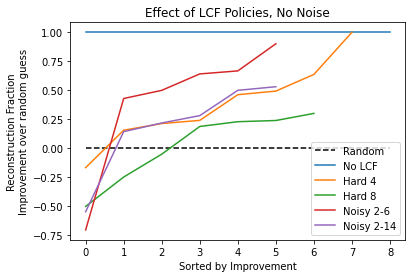

In [15]:
dfNoLcf = df.query('a_noiA == 0 and a_supP == "hard" and a_supT == 0').sort_values(by=['s_impv'])
dfHard4 = df.query('a_noiA == 0 and a_supP == "hard" and a_supT == 4').sort_values(by=['s_impv'])
dfHard8 = df.query('a_noiA == 0 and a_supP == "hard" and a_supT == 8').sort_values(by=['s_impv'])
dfNoisy4 = df.query('a_noiA == 0 and a_supP == "noisy" and a_supT == 4').sort_values(by=['s_impv'])
dfNoisy8 = df.query('a_noiA == 0 and a_supP == "noisy" and a_supT == 8').sort_values(by=['s_impv'])
plt.plot([0 for i in range(len(dfNoLcf['s_impv'].tolist()))],label='Random',color='black',linestyle='dashed')
plt.plot(dfNoLcf['s_impv'].tolist(),label='No LCF')
plt.plot(dfHard4['s_impv'].tolist(),label='Hard 4')
plt.plot(dfHard8['s_impv'].tolist(),label='Hard 8')
plt.plot(dfNoisy4['s_impv'].tolist(),label='Noisy 2-6')
plt.plot(dfNoisy8['s_impv'].tolist(),label='Noisy 2-14')
plt.ylabel('Reconstruction Fraction\nImprovement over random guess')
plt.xlabel('Sorted by Improvement')
plt.title('Effect of LCF Policies, No Noise')
plt.legend()
plt.show()

The graph above compares different LCF strategies when there is no noise. Note that each line is sorted independently (the same point on the x axis does not represent the same experimental parameters for all lines).

*Hard* means a hard threshold. *Hard 4* means that any user count below 4 is suppressed, and 4 and above is not suppressed. *Noisy* means that the threshold is chosen randomly from a uniform range (i.e. 2 to 6). The y axis is improvement in reconstruction over random guessing. Note that random guessing reconstructs around 50% to 60% of all rows correctly. The dashed line represents the random reconstruction quality. Above this line is better than random.

As expected, higher threshold leads to poorer reconstruction. Surprisingly, reconstruction is better with a noisy threshold. I'm not sure why this is. (Though note that a noisy threshold makes other attacks harder, so the fact that the linear reconstruction does better with noisy threshold doesn't mean we should not use one.) 

The most surprising thing, however, is the wide range of reconstruction scores, ranging from worse than random to perfect.

The data used to generate the above graph is shown below.

In [16]:
display(df.query('a_noiA == 0 and a_supT in (0,4,8)').sort_values(by=['a_supP','a_supT','s_impv']))

,s_matc,s_impv,s_susc,a_noiA,a_noiP,a_supP,a_supT,t_shape,t_tab
0,1.000,1.000000,1.000,0,simple,hard,0,"[10, 10, 10]",complete
4,1.000,1.000000,0.357,0,simple,hard,0,"[10, 10, 10]",random
9,1.000,1.000000,1.000,0,simple,hard,0,"[3, 3, 3, 3]",complete
16,1.000,1.000000,0.654,0,simple,hard,0,"[3, 3, 3, 3]",random
23,1.000,1.000000,1.000,0,simple,hard,0,"[3, 3, 3]",complete
30,1.000,1.000000,0.481,0,simple,hard,0,"[3, 3, 3]",random
37,1.000,1.000000,0.422,0,simple,hard,0,"[5, 5, 5, 5]",random
39,1.000,1.000000,1.000,0,simple,hard,0,"[5, 5, 5]",complete
46,1.000,1.000000,0.344,0,simple,hard,0,"[5, 5, 5]",random
12,0.568,-0.167568,0.247,0,simple,hard,4,"[3, 3, 3, 3]",complete


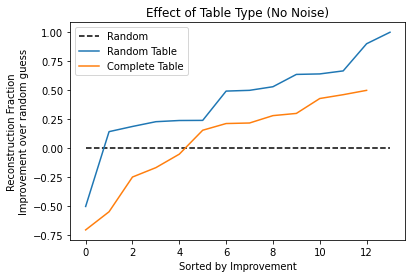

In [19]:
dfRan = df.query('t_tab == "random" and a_supT in (4,8)').sort_values(by=['s_impv'])
dfCom = df.query('t_tab == "complete" and a_supT in (4,8)').sort_values(by=['s_impv'])
plt.plot([0 for i in range(len(dfRan['s_impv'].tolist()))],label='Random',color='black',linestyle='dashed')
plt.plot(dfRan['s_impv'].tolist(),label='Random Table')
plt.plot(dfCom['s_impv'].tolist(),label='Complete Table')
plt.ylabel('Reconstruction Fraction\nImprovement over random guess')
plt.xlabel('Sorted by Improvement')
plt.title('Effect of Table Type (No Noise)')
plt.legend()
plt.show()

The above graph shows that the type of table (random versus complete) has a marked effect on reconstruction success. A random table is one where values for each row are randomly selected from the possible set. A complete table is one where all possible value combinations are assigned (one per row). Reconstruction is better for random tables than for complete tables, though I don't know why. Again the range of success is still wide. 



[Text(0.5, 0, 'Table parameters'),
 Text(0, 0.5, 'Reconstruction Fraction\nImprovement over random guess'),
 Text(0.5, 1.0, 'Effect of table shape')]

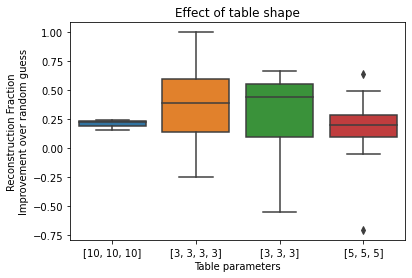

In [32]:
dfTab = df.query('a_supT in (4,8)')
bp = sns.boxplot(x=dfTab["t_shape"],y=dfTab["s_impv"])
bp.set(xlabel = 'Table shape', ylabel='Reconstruction Fraction\nImprovement over random guess',title='Effect of table shape')


The above graph looks at how reconstruction success differs with the "shape" of the table. The notation \[5,5,5\] means that there are three columns each with 5 distinct values. I'm not sure what this graphs tells us (other than that we are not really getting to the bottom of why there is so much variation between experiments).

[Text(0.5, 0, 'Table shape'),
 Text(0, 0.5, 'Solution time (seconds)'),
 Text(0.5, 1.0, 'Effect of table shape on solution time')]

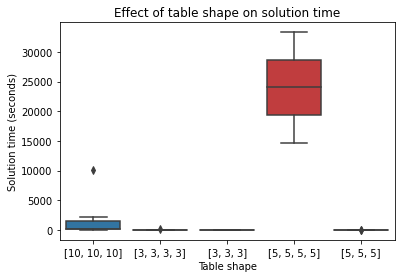

In [35]:
bp = sns.boxplot(x=dfAll["t_shape"],y=dfAll["s_tim"])
bp.set(xlabel = 'Table shape', ylabel='Solution time (seconds)',title='Effect of table shape on solution time')

By the way, here we can see that as the size of the table grows (more columns, more values per column), the length of time to generate a solution grows dramatically. (30K seconds is around 8 hours.)


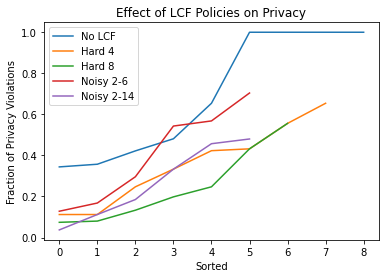

In [37]:
dfNoLcf = df.query('a_noiA == 0 and a_supP == "hard" and a_supT == 0').sort_values(by=['s_susc'])
dfHard4 = df.query('a_noiA == 0 and a_supP == "hard" and a_supT == 4').sort_values(by=['s_susc'])
dfHard8 = df.query('a_noiA == 0 and a_supP == "hard" and a_supT == 8').sort_values(by=['s_susc'])
dfNoisy4 = df.query('a_noiA == 0 and a_supP == "noisy" and a_supT == 4').sort_values(by=['s_susc'])
dfNoisy8 = df.query('a_noiA == 0 and a_supP == "noisy" and a_supT == 8').sort_values(by=['s_susc'])
plt.plot(dfNoLcf['s_susc'].tolist(),label='No LCF')
plt.plot(dfHard4['s_susc'].tolist(),label='Hard 4')
plt.plot(dfHard8['s_susc'].tolist(),label='Hard 8')
plt.plot(dfNoisy4['s_susc'].tolist(),label='Noisy 2-6')
plt.plot(dfNoisy8['s_susc'].tolist(),label='Noisy 2-14')
plt.ylabel('Fraction of Privacy Violations')
plt.xlabel('Sorted')
plt.title('Effect of LCF Policies on Privacy')
plt.legend()
plt.show()

Up to now, we've been look at the reconstruction quality. This is simply a measure of how many rows in the reconstructed table match rows in the original table. It is important to note that reconstruction per se does not nescesarily mean that a privacy violation has occured (i.e. singling out or inference). For instance, if two or more users in the original table have the same data, then those users cannot be singled out, and one can argue that privacy is preserved (in a K-anonymity sense). Likewise if multiple users have identical values for N-1 columns, but the Nth column has multiple values among those users, then the Nth column cannot be inferred with 100% condidence. These users' privacy is preserved in a L-diversity sense.

In the above graph, a given row's privacy is violated if the row is singled-out (unique) in both the reconstructed table and the original table. Likewise, a given row's privacy is violated if a value can be inferred in both the reconstructed table and the original table. From the above graph, for any form of LCF, a substantial portion of rows do not have a privacy violation. zzzz we want to know the probability that a singling-out or inference guess is right though...

### Conclusion (LCF)

The main conclusion to draw from all of this is that Linear Reconstruction can work pretty well when the only defense is Low Count Filtering.

## Noise (without LCF)

In the following set of experiments, we look at the effect of simply adding noise to counts.